In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [9]:
from testmining.util import find_files
import os
import re
import pandas as pd
from testmining import apfd
from IPython.display import display

pattern = re.compile('^[a-zA-Z0-9.-]+@([\w-]+).csv$')
folder = '../output'
files = []
for item in os.listdir(folder):
    path = os.path.join(folder, item, 'baseline')
    
    if not os.path.exists(path) or not os.path.isdir(path):
        continue
    
    files.extend([(item, *x) for x in find_files(path, pattern)])

df = pd.DataFrame(files, columns=['project', 'strategy', 'fileName'])
display(pd.DataFrame(df['project'].value_counts()))
display(pd.DataFrame(df['strategy'].value_counts()))

,project
jcabi@jcabi-github,19
google@guava,19
eclipse@jetty.project,19
facebook@buck,19
l0rdn1kk0n@wicket-bootstrap,19
adamfisk@LittleProxy,19
brettwooldridge@HikariCP,19
deeplearning4j@deeplearning4j,19
square@okhttp,19
jsprit@jsprit,19


,strategy
matrix-tc-similarity,22
matrix-naive,22
bloom,22
matrix-file-similarity,22
matrix-conditional-prob,22
matrix-path-similarity,22
lru,22
random,22
optimal-failure-duration,22
recently-failed,22


In [14]:
df['apfd'] = df['fileName'].apply(apfd.file_apfd)

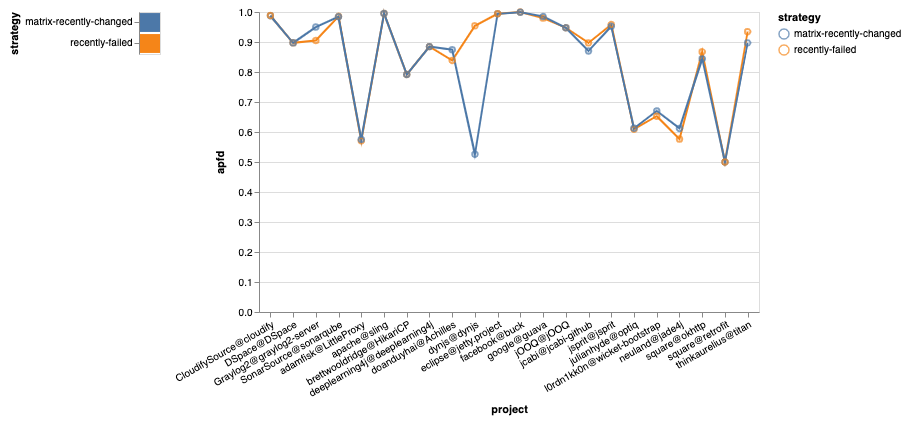

In [16]:
import altair as alt

df = df[df.strategy.isin(['recently-failed', 'matrix-recently-changed'])]

strategies_df = pd.DataFrame({'strategy': df['strategy'].unique()})

selection = alt.selection_multi(fields=['strategy'])
color = alt.condition(selection, alt.Color('strategy:N'), alt.value('lightgray'))
strategy_selector = alt.Chart(strategies_df).mark_rect().encode(y='strategy', color=color).add_selection(selection)

strategy_line = alt.Chart(df).mark_line().encode(
  x=alt.X('project', axis=alt.Axis(labelAngle=-30)),
  y=alt.Y('apfd', scale=alt.Scale(domain=[0, 1])),
  color='strategy',
).transform_filter(selection)

strategy_point = alt.Chart(df).mark_point().encode(
  x=alt.X('project', axis=alt.Axis(labelAngle=-30)),
  y=alt.Y('apfd', scale=alt.Scale(domain=[0, 1])),
  color='strategy',
  tooltip=['project', 'strategy', 'apfd']).transform_filter(selection)

strategy_selector | (strategy_line + strategy_point).properties(width=500)